In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman = niidb.FMriActivationsDb('data/new_pieman.db')

In [5]:
dtfa = DTFA.DeepTFA(new_pieman.all(), mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/19/2018 09:59:44 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-19-task-intact2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/19/2018 09:59:47 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-70-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/19/2018 09:59:50 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-72-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/19/2018 09:59:53 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/19/2018 09:59:55 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/19/2018 09:59:58 Loading Nifti image /home/eli/Documents/new_pieman

In [6]:
dtfa.load_state('data/pieman_k100_n700_06192018_015333')

This next cell works around an apparent bug in PyTorch, due to which the per-block weight distributions weren't being loaded properly.

In [7]:
import torch

guide_state = torch.load('data/pieman_k100_n700_06192018_015333.dtfa_guide')
dtfa.variational.hyperparams.block__weights__mu.data = guide_state['hyperparams.block__weights__mu']
dtfa.variational.hyperparams.block__weights__sigma.data = guide_state['hyperparams.block__weights__sigma']

In [8]:
def task_labeler(b):
    return b.task

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

06/19/2018 10:06:19 Plotting factors for Participant 83, run 0


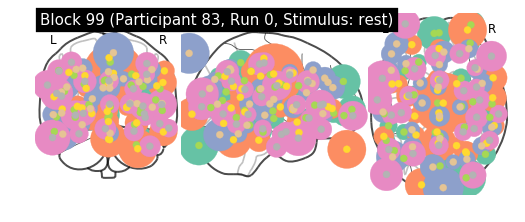

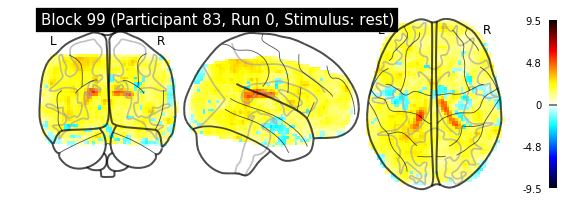

06/19/2018 10:06:59 Reconstruction Error (Frobenius Norm): 3.70822827e+03 out of 4.94737256e+03


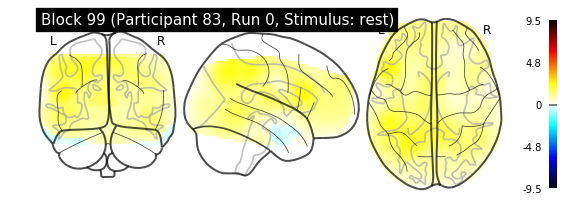

In [9]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=task_labeler)
        dtfa.plot_original_brain(index, labeler=task_labeler)
        dtfa.plot_reconstruction(index, labeler=task_labeler)


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


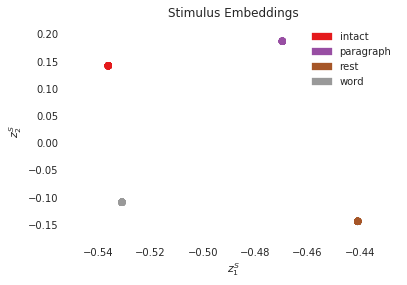

In [10]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [11]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


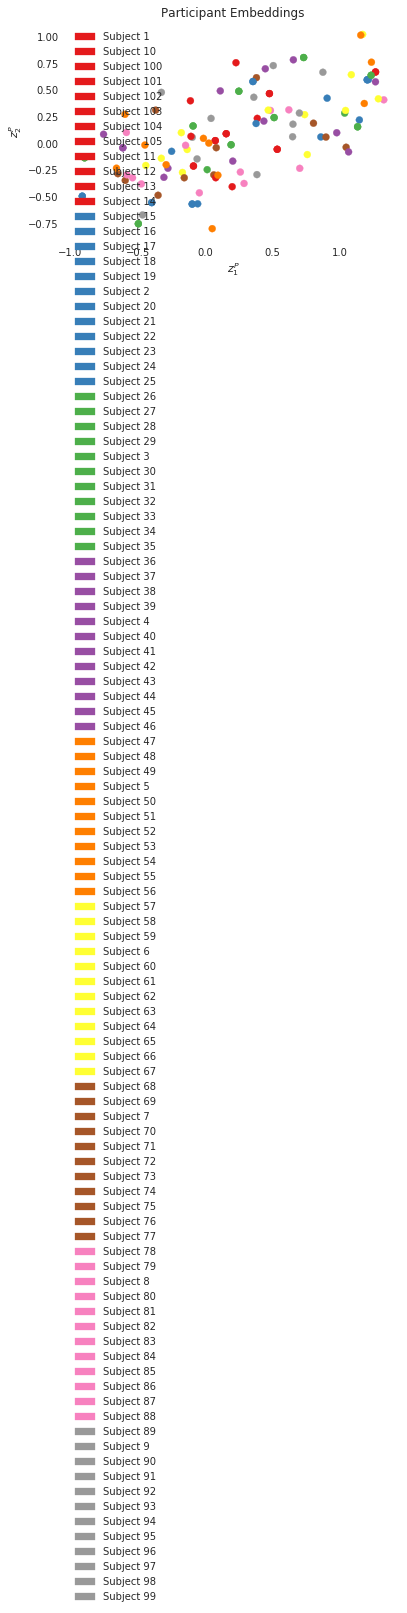

In [12]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [13]:
dtfa.decoding_accuracy()

paragraph
intact
rest


/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:363: RuntimeWarning: divide by zero encountered in log
  return 0.5 * (np.log(1 + r) - np.log(1 - r))
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:394: RuntimeWarning: invalid value encountered in add
  isfc_mat[n, :] = isfc_mat[n, :] + vectorize(next_corrs + next_corrs.T)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


word


{'intact': {'isfc': [array([0.05743243, 0.0777027 , 0.00337838, 0.02702703, 0.00337838,
          0.00675676, 0.00675676, 0.        , 0.01013514])],
  'kl': [array([0.08783784, 0.06418919, 0.0472973 , 0.06081081, 0.03040541,
          0.03040541, 0.01351351, 0.02027027, 0.01689189])],
  'mixed': [array([0.17567568, 0.29054054, 0.03040541, 0.09797297, 0.01013514,
          0.03040541, 0.00675676, 0.01689189, 0.00675676])],
  'node': [array([0.13513514, 0.24324324, 0.0472973 , 0.12162162, 0.01689189,
          0.05743243, 0.00675676, 0.01689189, 0.00675676])]},
 'paragraph': {'isfc': [array([0.03378378, 0.03040541, 0.01689189, 0.01689189, 0.00337838,
          0.00337838, 0.01351351, 0.        , 0.01689189])],
  'kl': [array([0.04391892, 0.0777027 , 0.03040541, 0.06081081, 0.02027027,
          0.03378378, 0.01351351, 0.02364865, 0.01351351])],
  'mixed': [array([0.13851351, 0.14527027, 0.03716216, 0.06418919, 0.01013514,
          0.02364865, 0.01013514, 0.01689189, 0.00675676])],
  'no